<a href="https://colab.research.google.com/github/mariam2002212/JS-simplePbls/blob/naive_bayes/ml2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

load dataset

In [1]:
import pandas as pd
data = pd.read_csv('weather_forecast_data.csv')

print(data.head())

   Temperature   Humidity  Wind_Speed  Cloud_Cover     Pressure     Rain
0    19.096119  71.651723   14.782324    48.699257   987.954760  no rain
1    27.112464  84.183705   13.289986    10.375646  1035.430870  no rain
2    20.433329  42.290424    7.216295     6.673307  1033.628086  no rain
3    19.576659  40.679280    4.568833    55.026758  1038.832300  no rain
4    19.828060  93.353211    0.104489    30.687566  1009.423717  no rain


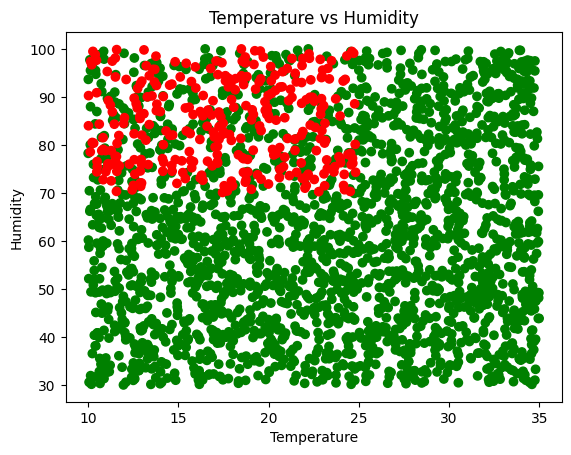

In [3]:
import matplotlib.pyplot as plt
rain=data["Rain"]

colors=[]
for item in rain:
  if item =="no rain":
    colors.append("green")
  else:
    colors.append("red")

plt.scatter(data['Temperature'], data['Humidity'],c=colors)
plt.xlabel('Temperature')
plt.ylabel('Humidity')
plt.title('Temperature vs Humidity')
plt.show()

preprocessing

first we want to identify the missing data

In [4]:
missing_data = data.isnull().sum()
print("Missing values in each column:")
print(missing_data)

Missing values in each column:
Temperature    25
Humidity       40
Wind_Speed     32
Cloud_Cover    33
Pressure       27
Rain            0
dtype: int64


then we want to handle the missing data
first, technique--> dropping missing values

In [5]:
dropped_data = data.dropna()
print("Data after dropping missing values:")
print(dropped_data.head())

Data after dropping missing values:
   Temperature   Humidity  Wind_Speed  Cloud_Cover     Pressure     Rain
0    19.096119  71.651723   14.782324    48.699257   987.954760  no rain
1    27.112464  84.183705   13.289986    10.375646  1035.430870  no rain
2    20.433329  42.290424    7.216295     6.673307  1033.628086  no rain
3    19.576659  40.679280    4.568833    55.026758  1038.832300  no rain
4    19.828060  93.353211    0.104489    30.687566  1009.423717  no rain


second technique, replacing them with the average of the feature."handled both numerical features and non numerical features"

1st, Separate numeric and non-numeric features

In [6]:
numeric_features = data.select_dtypes(include=['number']).columns
non_numeric_features = data.select_dtypes(exclude=['number']).columns

2nd, calc avg value for numeric features

In [7]:
data_replaced = data.copy()
data_replaced[numeric_features] = data_replaced[numeric_features].fillna(data_replaced[numeric_features].mean())

3rd, handle non numeric features "using mode, is used for categorical data in our case"


In [8]:
for feature in non_numeric_features:
    data_replaced[feature] = data_replaced[feature].fillna(data_replaced[feature].mode()[0])

In [9]:
print("\nData after replacing missing values with the average of the feature:")
print(data_replaced.head())


Data after replacing missing values with the average of the feature:
   Temperature   Humidity  Wind_Speed  Cloud_Cover     Pressure     Rain
0    19.096119  71.651723   14.782324    48.699257   987.954760  no rain
1    27.112464  84.183705   13.289986    10.375646  1035.430870  no rain
2    20.433329  42.290424    7.216295     6.673307  1033.628086  no rain
3    19.576659  40.679280    4.568833    55.026758  1038.832300  no rain
4    19.828060  93.353211    0.104489    30.687566  1009.423717  no rain


Splitting our data to training and testing for training and evaluating our
models

train/test split "on non handled data"

In [10]:
from sklearn.model_selection import train_test_split

features = data.iloc[:, :-1]
target = data.iloc[:, -1] #akher column hwa eltarget w elba2y features

feature_train, feature_test, target_train, target_test = train_test_split(features, target, test_size=0.2, random_state=20)
print("\nTraining set size:", feature_train.shape)
print("Testing set size:", feature_test.shape)


Training set size: (2000, 5)
Testing set size: (500, 5)


train/test split"on the handeled data with the dropping missing data technique"

In [11]:
from sklearn.model_selection import train_test_split

features = dropped_data.iloc[:, :-1]
target = dropped_data.iloc[:, -1] #akher column hwa eltarget w elba2y features

feature_train_dropped, feature_test_dropped, target_train_dropped, target_test_dropped = train_test_split(features, target, test_size=0.2, random_state=24)
print("\nTraining set size:", feature_train_dropped.shape)
print("Testing set size:", feature_test_dropped.shape)


Training set size: (1877, 5)
Testing set size: (470, 5)


train/test split"on the handeled data with the replacing missing data technique"

In [12]:


features = data_replaced.iloc[:, :-1]
target = data_replaced.iloc[:, -1] #akher column hwa eltarget w elba2y features

feature_train_replaced, feature_test_replaced, target_train_replaced, target_test_replaced = train_test_split(features, target, test_size=0.2, random_state=20)
print("\nTraining set size:", feature_train_replaced.shape)
print("Testing set size:", feature_test_replaced.shape)


Training set size: (2000, 5)
Testing set size: (500, 5)


feature scaling

Scale the numeric features in the training set

In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
feature_train_numeric = feature_train[numeric_features]
feature_train_scaled = scaler.fit_transform(feature_train_numeric)
feature_train_dropped_numeric=feature_train_dropped[numeric_features]
feature_train_dropped_scaled = scaler.fit_transform(feature_train_dropped_numeric)
feature_train_replaced_numeric=feature_train_replaced[numeric_features]
feature_train_replaced_scaled = scaler.fit_transform(feature_train_replaced_numeric)
feature_train[numeric_features] = feature_train_scaled
feature_train_dropped[numeric_features] = feature_train_dropped_scaled
feature_train_replaced[numeric_features] = feature_train_replaced_scaled

print("Scaled Training Data:")
print(feature_train.head())
print("Scaled Training dropped Data:")
print(feature_train_dropped.head())
print("Scaled Training  replaced Data:")
print(feature_train_replaced.head())

Scaled Training Data:
      Temperature  Humidity  Wind_Speed  Cloud_Cover  Pressure
2202    -0.236241  0.649045   -1.233287     1.540939  1.501493
766      0.837869  0.826690    0.472179    -1.612293  0.583840
714      0.482423 -0.594048   -0.138226          NaN  0.679527
1801     0.985756  0.842187    1.207046     1.509516  0.720259
2038    -1.728037 -0.622781   -1.392236    -0.674957 -0.472427
Scaled Training dropped Data:
      Temperature  Humidity  Wind_Speed  Cloud_Cover  Pressure
1393     0.316341  0.953360   -0.773017    -0.293621 -0.844798
44      -0.882151 -0.800889   -1.348096    -1.429369 -1.202206
1087     0.717007  0.128807    0.437261     1.432991 -1.148291
1268     0.400735 -1.680496   -0.577251     0.048602  1.221948
1801     1.002973  0.843221    1.197734     1.517268  0.749780
Scaled Training  replaced Data:
      Temperature  Humidity  Wind_Speed  Cloud_Cover  Pressure
2202    -0.237315  0.654273   -1.241286     1.549968  1.510454
766      0.841933  0.833311    0.4

Scale the numeric features in the testing set

In [14]:
feature_test_numeric = feature_test[numeric_features]
feature_test_scaled = scaler.transform(feature_test_numeric)
feature_test_dropped_numeric=feature_test_dropped[numeric_features]
feature_test_dropped_scaled = scaler.transform(feature_test_dropped_numeric)
feature_test_replaced_numeric=feature_test_replaced[numeric_features]
feature_test_replaced_scaled = scaler.transform(feature_test_replaced_numeric)

feature_test[numeric_features] = feature_test_scaled
feature_test_dropped[numeric_features] = feature_test_dropped_scaled
feature_test_replaced[numeric_features] = feature_test_replaced_scaled

print("Scaled Testing Data:")
print(feature_test.head())
print("Scaled Testing dropped Data:")
print(feature_test_dropped.head())
print("Scaled Testing replaced Data:")
print(feature_test_replaced.head())

Scaled Testing Data:
      Temperature  Humidity  Wind_Speed  Cloud_Cover  Pressure
1760    -1.503473 -0.728458   -1.706502     0.587725  0.315251
2345    -0.739630  0.974453    1.495514     1.457237  1.669529
2370    -0.420437  1.479228   -1.463625     0.236463 -1.395475
187      1.595409 -0.396737   -1.326121          NaN -1.633859
1911    -1.367837 -0.195413   -1.245203    -0.050356  1.143972
Scaled Testing dropped Data:
      Temperature  Humidity  Wind_Speed  Cloud_Cover  Pressure
689     -0.744257 -0.440181   -1.666318     1.490759 -0.692565
1037     0.107841  0.008354   -0.639106     1.466838 -0.505414
1422    -1.524919 -1.166959    0.998911     1.050280 -0.972939
1557    -0.175711  0.683090    1.515979    -0.395072  0.385820
1419    -0.700551  0.018388   -1.525402     1.538342  1.422103
Scaled Testing replaced Data:
      Temperature  Humidity  Wind_Speed  Cloud_Cover  Pressure
1760    -1.503473 -0.728458   -1.706502     0.587725  0.315251
2345    -0.739630  0.974453    1.49551

implement decision tree

i got accuracy "using dropped data": 0.9957


i got accuracy "using replaced data": 0.9860

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report

decision_tree_model = DecisionTreeClassifier(random_state = 20)

decision_tree_model.fit(feature_train, target_train)#train el model
predicted_target = decision_tree_model.predict(feature_test)

accuracy = accuracy_score(target_test, predicted_target)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.9860


Precision
Definition: The ratio of correctly predicted positive instances to the total predicted positives.
Meaning: Measures how many of the predicted positives are actually correct.
Accuracy
Definition: The ratio of correctly predicted instances to the total number of instances.
Meaning: Measures how often the model is correct overall.
Recall (Sensitivity or True Positive Rate)
Definition: The ratio of correctly predicted positive instances to all actual positives.
Meaning: Measures how many of the actual positives were correctly identified.


The Gaussian Naive Bayes classifier, which you're using in your code (GaussianNB), cannot handle missing values directly


weighted hndles the imblance in the data and binary will not work since the target is labled as rain and no rain so it will not know which is 1 +ve and which 0 -ve


In [17]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report



naive_bayes_model = GaussianNB()

naive_bayes_model.fit(feature_train_replaced, target_train_replaced)

predicted_target = naive_bayes_model.predict(feature_test_replaced)

accuracy = accuracy_score(target_test_replaced, predicted_target)
#accuracy=naive_bayes_model.score(feature_test, target_test)
precision=precision_score(target_test_replaced, predicted_target, average='weighted')
recall=recall_score(target_test_replaced, predicted_target, average='weighted')
print(f"Accuracy  of handling by replacing : {accuracy:.4f}")
print(f"recall of handling by replacing {recall:.4f}")
print(f"precision of handling by replacing {precision:.4f}")

Accuracy  of handling by replacing : 0.9500
recall of handling by replacing 0.9500
precision of handling by replacing 0.9527


i got accuracy of 95 using

In [18]:


naive_bayes_model.fit(feature_train_dropped, target_train_dropped)
predicted_target = naive_bayes_model.predict(feature_test_dropped)
accuracy = accuracy_score(target_test_dropped, predicted_target)

precision=precision_score(target_test_dropped, predicted_target, average='weighted')
recall=recall_score(target_test_dropped, predicted_target, average='weighted')
print(f"Accuracy of handling by droppin nan: {accuracy:.4f}")
print(f"recall of handling by droppin nan: {recall:.4f}")
print(f"precision of handling by droppin nan: {precision:.4f}")

Accuracy of handling by droppin nan: 0.9638
recall of handling by droppin nan: 0.9638
precision of handling by droppin nan: 0.9653
